In [ ]:
# windows analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']  

In [ ]:
##  1. Supp_Figure_10b --- --- 

0.0002658902329837704


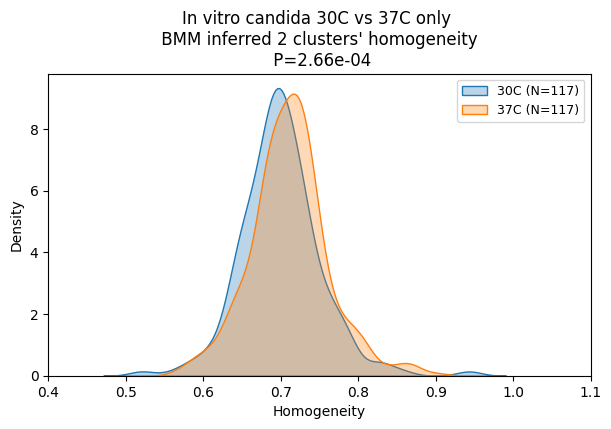

In [2]:
dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig10/Data/'
pure = pd.read_csv(dir+'vitro_pure_allinfo.txt', sep='\t')
pure.columns
pure['weighted_corr'] = pd.to_numeric(pure['weighted_corr'], errors='coerce')
pure['replicate'] = pd.to_numeric(pure['replicate'], errors='coerce')
pure['ACC'] = pd.to_numeric(pure['ACC'], errors='coerce')
pure['window'] = pure['window_start'] + '_' + pure['window_end']
pure['id'] = pure['gene'] + ':' + pure['window']
pure = pure[(pure['replicate'] == 0) | (pure['replicate'] == 1) | (pure['replicate'] == 2)]

aver = pure.groupby(['condition', 'gene', 'region'])['weighted_corr'].mean()
aver = aver.reset_index()

### to get the common window 

tmp1 = aver[aver['condition'] == '30C']
tmp2 = aver[aver['condition'] == '37C']

dplot =pd.merge(tmp1,tmp2,how='inner', on=['gene','gene'])


#perform Kolmogorov-Smirnov test
res=ks_2samp(dplot.weighted_corr_x,dplot.weighted_corr_y)
p_value=res[1]
print(p_value)

plt.figure(figsize=(7, 4), dpi=100)

sns.kdeplot(dplot.weighted_corr_x, label="30C (N=%s)" % (int(len(dplot.gene.unique()))), color=colors[0], fill=True,alpha=.3,linewidth=1)
sns.kdeplot(dplot.weighted_corr_y, label="37C (N=%s)" % (int(len(dplot.gene.unique()))), color=colors[1], fill=True,alpha=.3,linewidth=1)

plt.xlabel("Homogeneity")
plt.xlim(0.4,1.1)
plt.legend(loc="upper right", fontsize=9)
plt.title("In vitro candida 30C vs 37C only \n BMM inferred 2 clusters' homogeneity \n P=2.66e-04")

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Supp_Fig10/Data/'
plt.savefig(dir_out+'Supp_Figure_10b_vitro_30C_vs_37C_homo_density.pdf',bbox_inches='tight', dpi=300) 